In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [333]:
num_trials = 100
simulated_spike_trains = []
for i in range(num_trials):
    spike_train_i = np.random.randint(1000, size=100)/1000.
    #temp_mask = ((spike_train_i > 0.1) & (spike_train_i <= 0.4)) | ((spike_train_i > 0.45) & (spike_train_i <= 0.7))
    #spike_train_i = spike_train_i[temp_mask]
    simulated_spike_trains.append(spike_train_i)
simulated_spike_trains = np.array(simulated_spike_trains)

(-1.5, 100.5)

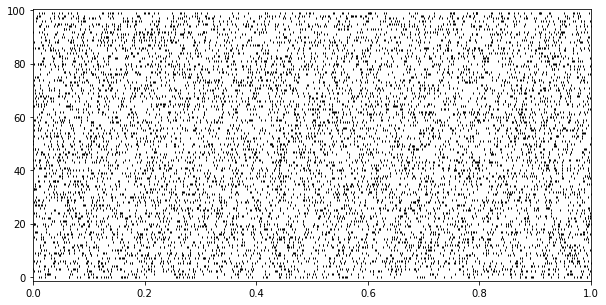

In [334]:
fig, axs = plt.subplots(figsize=(10,5), facecolor='w')
for i in range(num_trials):
    axs.plot(simulated_spike_trains[i], np.ones(shape=len(simulated_spike_trains[i]))*i, marker='|', color='k', ls='', ms=2)
axs.set_xlim([0,1])
axs.set_ylim([-1.5,100.5])

In [539]:
def psth(spike_times, ii_spike_times, neuron_id, window_length, sel_trials=None, nbins=10, norm=False):
    
    if window_length is None:
        window_length = np.max(ii_spike_times[:, neuron_id,])
        
    if sel_trials is None:
        sel_trials = np.arange(ii_spike_times.shape[0], dtype=np.int)
        #print (sel_trials)
        
    M = len(sel_trials) # number of epochs
    ret_mat = np.zeros(shape=(M, nbins), dtype=np.float16)
    
    for i in range(M):
        i_trials = sel_trials[i]
        temp_spike_train = spike_times[ii_spike_times[i_trials, neuron_id, 0]:ii_spike_times[i_trials, neuron_id, 1]].copy()
        temp_spike_train.sort()
        #print (binned_firing_rates(temp_spike_train, nbins=nbins, window_length=window_length))
        ret_mat[i,:], _ = np.histogram(temp_spike_train, bins=nbins) #binned_firing_rates(temp_spike_train, nbins=nbins, window_length=window_length)
        #print (ret_mat)
        #print (ret_mat[:, i].shape, ret_mat.shape)
        
    if norm:
        return np.sum(ret_mat, axis=0)/(np.sum(ret_mat)*nbins)
    return np.sum(ret_mat, axis=0)/(nbins)#.copy()

In [540]:
def test_data(simulated_spike_trains):
    spike_times = [];
    ii_spike_times = [];
    
    index = 0; 
    for i_M in range(simulated_spike_trains.shape[0]):
        temp_ii_spike_times = []
        for i_N in range(1):
            spike_times.append(simulated_spike_trains[i_M])
            temp_ii_spike_times.append([index, index+len(simulated_spike_trains[i_M])])
            index+=len(simulated_spike_trains[i_M])
        ii_spike_times.append(temp_ii_spike_times)
    
    spike_times = np.concatenate(spike_times)
    ii_spike_times = np.array(ii_spike_times)
    
    return spike_times, ii_spike_times

spike_times, ii_spike_times = test_data(simulated_spike_trains)

In [541]:
spike_times.shape, ii_spike_times.shape

((10000,), (100, 1, 2))

In [542]:
neuron_id = 0;
window_length = 1;

In [563]:
nbins = 10

In [567]:
mat_psth = psth(spike_times, ii_spike_times, neuron_id, window_length, sel_trials=None, nbins=nbins, norm=True)

In [573]:
mat_psth

array([0.0112 , 0.00985, 0.01005, 0.00943, 0.00978, 0.00979, 0.00938,
       0.00996, 0.00954, 0.01102], dtype=float32)

In [571]:
from sklearn.neighbors import KernelDensity

In [643]:
data = np.array((np.arange(len(mat_psth)).reshape(-1,1), mat_psth.reshape(-1,1)))[:,:,0].T
data, data.shape

(array([[0.     , 0.0112 ],
        [1.     , 0.00985],
        [2.     , 0.01005],
        [3.     , 0.00943],
        [4.     , 0.00978],
        [5.     , 0.00979],
        [6.     , 0.00938],
        [7.     , 0.00996],
        [8.     , 0.00954],
        [9.     , 0.01102]]),
 (10, 2))

[-3.20044572 -2.94930417 -2.93399034 -2.93381189 -2.93381146 -2.93381146
 -2.93381188 -2.93399035 -2.94930427 -3.20044581]


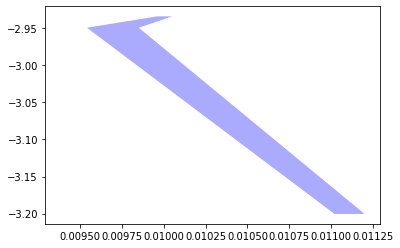

In [646]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.75)
kde.fit(data)
print (kde.score_samples(data))
#log_dens = kde.score_samples(np.arange(len(mat_psth)))
#print (kde)
plt.fill(mat_psth, kde.score_samples(data), fc="#AAAAFF")
#ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

Text(0.5, 0, '$Time\\ [s]$')

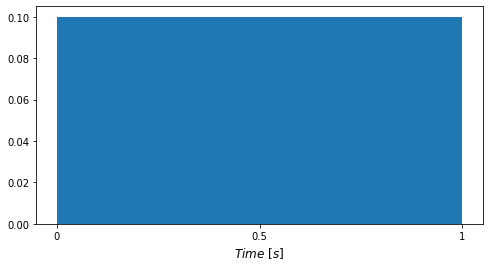

In [569]:
fig, axs = plt.subplots(figsize=(8,4), facecolor='w')
axs.bar(np.arange(nbins,dtype=np.int), np.sum(mat_psth, axis=0), width=1, align='edge')
axs.set_xticks([0, nbins/2, nbins])
axs.set_xticklabels([0, 0.5*window_length, 1*window_length])#[0, 0.5*window_length, window_length])
#axs.set_xticklabels((np.arange(0.5, nbins+1, nbins//2)-0.5)//(nbins))
axs.set_xlabel("$Time\ [s]$", fontsize=12)

---- 

In [22]:
spike_times    = np.load("demo_dataset_allen/spike_times.npy")
ii_spike_times = np.load("demo_dataset_allen/ii_spike_times.npy")

In [30]:
spike_times is None

False

In [236]:
?np.linspace

In [272]:
def testing(spike_train, nbins=10, step=0.1, window_length=1):
    lims = np.linspace(0, window_length, num=(nbins))
    hist = np.zeros(shape=nbins, dtype=np.int16)
    #for i in range(20):
    print (lims, lims.shape)
    
    window_length = 1
    i = 0
    i_spike = 0
    curr_time = 0
    
    while i < nbins: #i_spike < len(spike_train):
    #for spike in spike_train:
        spike = spike_train[i_spike]
        print (i, spike, '|', '%.2f' % lims[i], '%.2f' % lims[i+1], (spike>=lims[i] and spike<lims[i+1]))
    
        if ((spike>curr_time) and (spike<(curr_time+step))):
            hist[i]+=1
        else:
            i+=1 # index hist
        i_spike+=1
        curr_time +=step
        
    
    #for i in range(nbins-1):
        #while (onset+step < window_length):
    
    print ("hist", hist)

testing(np.arange(10)/10., 10, 0.2, 1)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] (10,)
0 0.0 | 0.00 0.11 True
1 0.1 | 0.11 0.22 False
2 0.2 | 0.22 0.33 False
3 0.3 | 0.33 0.44 False
4 0.4 | 0.44 0.56 False
5 0.5 | 0.56 0.67 False
6 0.6 | 0.67 0.78 False
7 0.7 | 0.78 0.89 False
8 0.8 | 0.89 1.00 False


IndexError: index 10 is out of bounds for axis 0 with size 10

In [275]:
np.histogram(a=np.arange(10)/10, bins=11)

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]),
 array([0.        , 0.08181818, 0.16363636, 0.24545455, 0.32727273,
        0.40909091, 0.49090909, 0.57272727, 0.65454545, 0.73636364,
        0.81818182, 0.9       ]))

In [230]:
test = np.array([1,4,5,2,3,4,6,7,9,8,2,1,1,1])/20.
test.sort()
test
onset = 0; step=1/20
window_length = 1
while (onset+step < window_length):
    print ("%.2f" % onset, test[(test>=onset) & (test<(onset+step))])
    onset+=step

0.00 []
0.05 [0.05 0.05 0.05 0.05]
0.10 [0.1  0.1  0.15]
0.15 []
0.20 [0.2 0.2]
0.25 [0.25]
0.30 [0.3]
0.35 [0.35]
0.40 [0.4]
0.45 [0.45]
0.50 []
0.55 []
0.60 []
0.65 []
0.70 []
0.75 []
0.80 []
0.85 []
0.90 []


In [105]:
from numba import njit
#njit
def binned_firing_rates(spike_train, nbins, window_length, step=None):
    """
    Note: It doesnt allow overlapping epochs.
    """
    binned_vec = np.empty(shape=nbins, dtype=np.int16)
    if step is None:
        step = window_length / nbins
    onset = 0; step=0.1#1/nbins
    window_length = 1
    i = 0
    while (onset+step < window_length):
        #print ("%.2f" % onset, spike_train[(spike_train>=onset) & (spike_train<(onset+step))])
        binned_vec[i] = len(spike_train[(spike_train>=onset) & (spike_train<(onset+step))])
        onset+=step
        i+=1
    return binned_vec

In [279]:
psth_mat = psth(spike_times, ii_spike_times, window_length = .1, neuron_id=0, nbins=10)

In [280]:
psth_mat

array([[16., 11., 11.,  7., 11., 10.,  9.,  7., 12.,  6.],
       [12., 14., 10.,  7., 10., 11., 12.,  5.,  8., 11.],
       [12., 10.,  4., 15.,  9., 11., 12.,  8.,  7., 12.],
       [ 8., 14., 11.,  8., 12.,  3., 12., 15.,  9.,  8.],
       [14., 12., 14.,  6.,  5., 15.,  4.,  8.,  7., 15.],
       [14.,  6., 12., 13.,  5., 10.,  7.,  9.,  8., 16.],
       [14.,  5.,  7., 11., 16., 11.,  9., 11.,  7.,  9.],
       [17.,  8.,  7., 12.,  7., 11., 10., 11.,  6., 11.],
       [ 7.,  4., 16., 12., 13., 14.,  8.,  8.,  5., 13.],
       [ 8.,  3., 13., 12.,  9., 10., 11., 14., 10., 10.],
       [ 8., 13., 11.,  6., 12.,  8., 13.,  8.,  8., 13.],
       [10., 15.,  9., 14.,  7.,  5., 13.,  8.,  9., 10.],
       [10., 12.,  9.,  9.,  8., 15.,  9.,  5., 13., 10.],
       [12., 15., 10., 13.,  6.,  9.,  5.,  9.,  6., 15.],
       [13.,  4., 12.,  8., 12.,  7., 10.,  8., 10., 16.],
       [14.,  7.,  8., 16.,  9., 10.,  8.,  6., 13.,  9.],
       [ 7., 10., 11.,  8.,  7., 13.,  7., 13.,  9., 15.

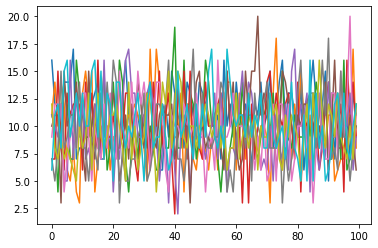

In [281]:
plt.plot(psth_mat)

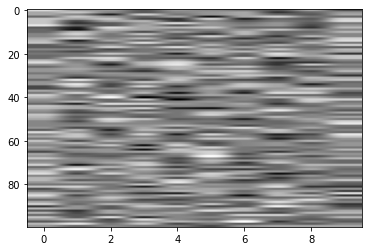

In [282]:
plt.imshow(np.array(psth_mat, dtype=np.int16), aspect='auto', cmap='Greys_r')

In [283]:
plt.imshow(psth_mat)

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>